In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
from torch import nn
from torchvision.utils import save_image
from torch.utils.data import DataLoader, WeightedRandomSampler
from torchvision import datasets
import torchvision.transforms as T
import torchvision.models as models
import os

In [2]:
IP_dir = '/kaggle/input/odir-5k-resnet/Augmented_Imgs'
transform = T.Compose([T.Resize((299, 299)),
                       T.ToTensor(),
                       T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])
dataset = datasets.ImageFolder(
    root := IP_dir,
    transform = transform
)

In [3]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [0.8, 0.2])
batch_size = 64
train_dl = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
device = "cuda"

In [4]:
def train(model, dataloader, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    
    for batch, (x,y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)
        pred = model(x)
        loss = loss_fn(pred, y)
        temp.append(loss.detach().cpu().numpy())
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        if batch%50 == 0:
            loss, current = loss.item(), batch*len(x)
            print(f"Loss:{loss:>7f} [{current:>5d}/{size:>5d}]")
    Train_Loss.append(np.mean(temp))

In [5]:
prevAcc = 0.0
def test(model, dataloader, loss_fn):
    size = len(dataloader.dataset)
    batch_num = len(dataloader)
    model.eval()

    test_loss, correct = 0,0
    for batch, (x,y) in enumerate(dataloader):
        x, y = x.to(device), y.to(device)
        pred = model(x)
        test_loss += loss_fn(pred, y).item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= batch_num
    Test_Loss.append(test_loss)
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

    global prevAcc
    if prevAcc < correct:
        ######
        name = "inception_v3.pth"
        torch.save(inception.state_dict(), name)
        ######
        print("Saved Successfully!!\n")
        prevAcc = correct

In [6]:
inception = models.inception_v3(pretrained=True)
for param in inception.parameters():
  param.requires_grad = True
num_classes = 6
inception.fc = nn.Sequential(
    nn.Linear(inception.fc.in_features, num_classes),
    nn.Softmax()
)
inception = inception.to(device)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 89.0MB/s] 


In [7]:
criteria = nn.CrossEntropyLoss()
def loss_fn(pred, target):
  main_output, aux_output1 = pred
  main_loss = criteria(main_output, target)
  aux_loss1 = criteria(aux_output1, target) if aux_output1 is not None else 0
  # aux_loss2 = criteria(aux_output2, target) if aux_output2 is not None else 0
  total_loss = main_loss + 0.3*aux_loss1
  return total_loss
inception_optimizer = torch.optim.Adam(inception.parameters(), lr=1e-3)

Epoch:1
-----------------------


/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Loss:4.153082 [    0/ 8493]
Loss:1.767975 [ 3200/ 8493]
Loss:1.884650 [ 6400/ 8493]
Test Error: 
 Accuracy: 57.3%, Avg loss: 1.460797 

Saved Successfully!!



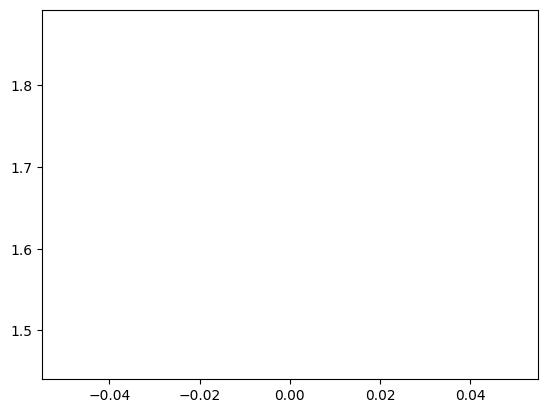

Epoch:2
-----------------------
Loss:1.728245 [    0/ 8493]
Loss:1.755632 [ 3200/ 8493]
Loss:1.494375 [ 6400/ 8493]
Test Error: 
 Accuracy: 59.5%, Avg loss: 1.441472 

Saved Successfully!!



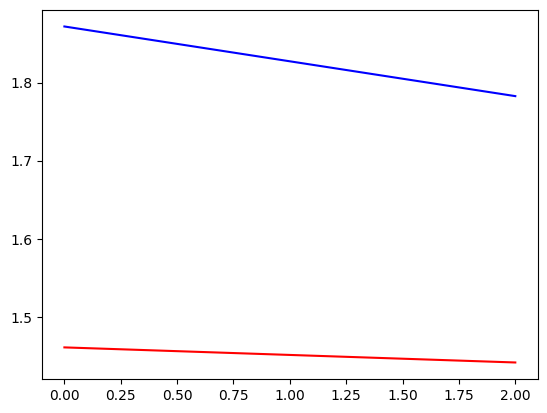

Epoch:3
-----------------------
Loss:1.721112 [    0/ 8493]
Loss:1.614859 [ 3200/ 8493]
Loss:1.815715 [ 6400/ 8493]
Test Error: 
 Accuracy: 61.3%, Avg loss: 1.423391 

Saved Successfully!!



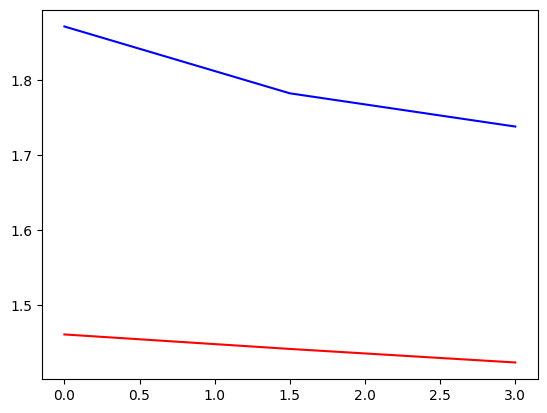

Epoch:4
-----------------------
Loss:1.495532 [    0/ 8493]
Loss:1.498486 [ 3200/ 8493]
Loss:1.614775 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.9%, Avg loss: 1.440249 



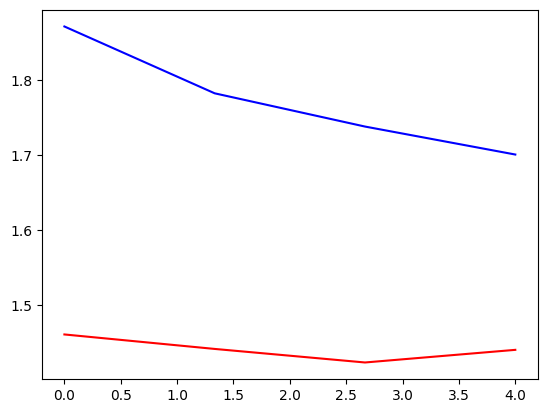

Epoch:5
-----------------------
Loss:1.488160 [    0/ 8493]
Loss:1.469267 [ 3200/ 8493]
Loss:1.499794 [ 6400/ 8493]
Test Error: 
 Accuracy: 67.5%, Avg loss: 1.363662 

Saved Successfully!!



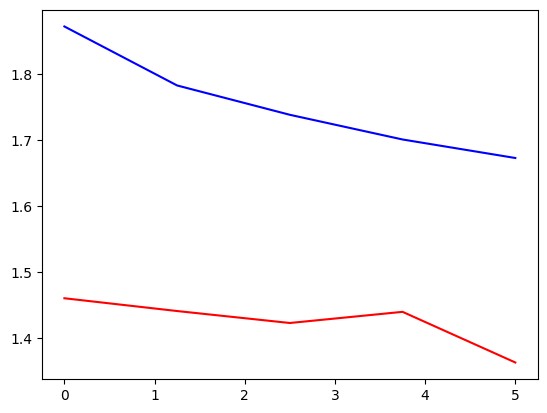

Epoch:6
-----------------------
Loss:1.392853 [    0/ 8493]
Loss:1.604450 [ 3200/ 8493]
Loss:1.568059 [ 6400/ 8493]
Test Error: 
 Accuracy: 58.8%, Avg loss: 1.444667 



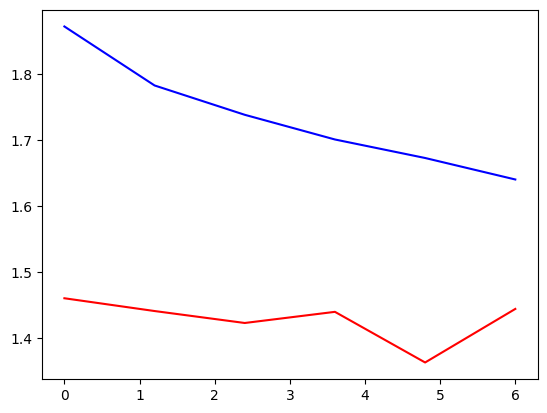

Epoch:7
-----------------------
Loss:1.347879 [    0/ 8493]
Loss:1.523194 [ 3200/ 8493]
Loss:1.384409 [ 6400/ 8493]
Test Error: 
 Accuracy: 71.5%, Avg loss: 1.317939 

Saved Successfully!!



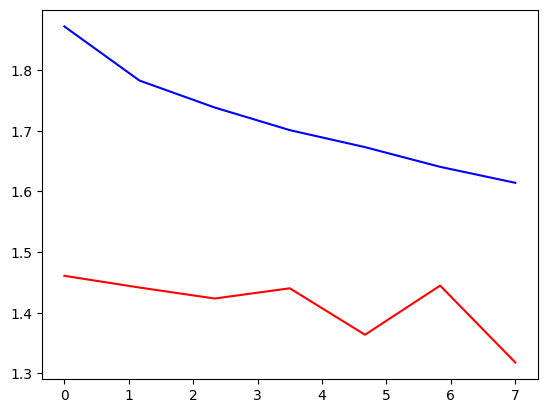

Epoch:8
-----------------------
Loss:1.497083 [    0/ 8493]
Loss:1.446546 [ 3200/ 8493]
Loss:1.348665 [ 6400/ 8493]
Test Error: 
 Accuracy: 72.0%, Avg loss: 1.317510 

Saved Successfully!!



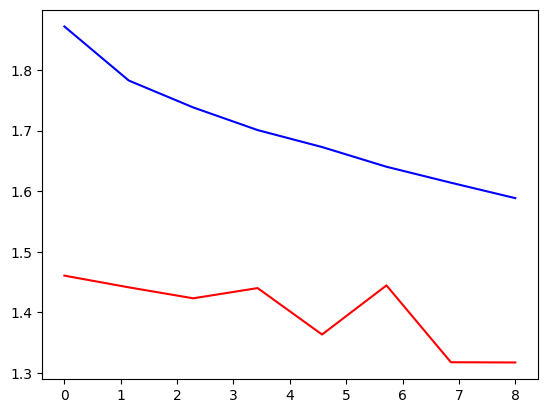

Epoch:9
-----------------------
Loss:1.419622 [    0/ 8493]
Loss:1.324159 [ 3200/ 8493]
Loss:1.336130 [ 6400/ 8493]
Test Error: 
 Accuracy: 73.3%, Avg loss: 1.305242 

Saved Successfully!!



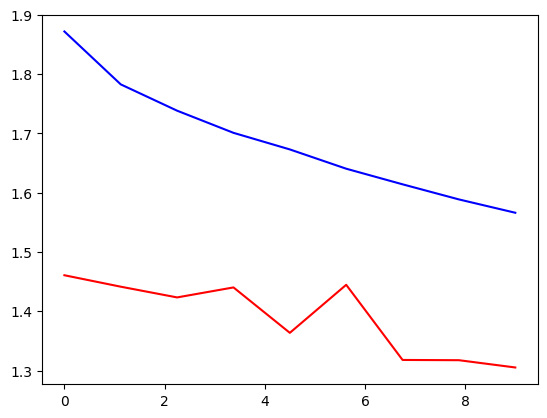

Epoch:10
-----------------------
Loss:1.253428 [    0/ 8493]
Loss:1.313599 [ 3200/ 8493]
Loss:1.350396 [ 6400/ 8493]
Test Error: 
 Accuracy: 73.6%, Avg loss: 1.305552 

Saved Successfully!!



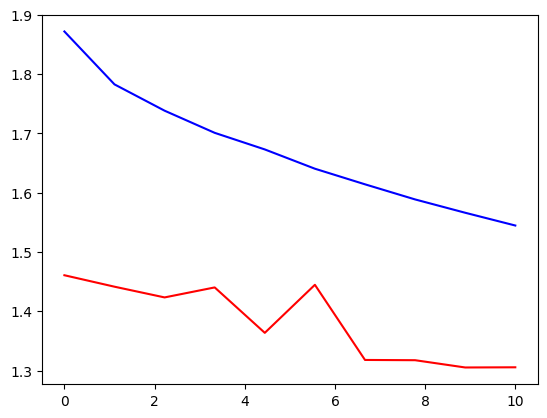

Epoch:11
-----------------------
Loss:1.395036 [    0/ 8493]
Loss:1.345866 [ 3200/ 8493]
Loss:1.477472 [ 6400/ 8493]
Test Error: 
 Accuracy: 76.4%, Avg loss: 1.273927 

Saved Successfully!!



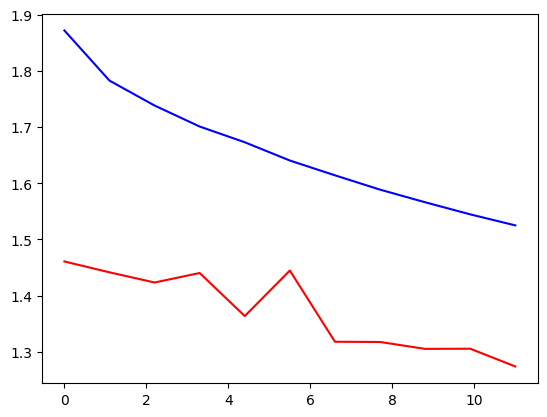

Epoch:12
-----------------------
Loss:1.257221 [    0/ 8493]
Loss:1.333960 [ 3200/ 8493]
Loss:1.287544 [ 6400/ 8493]
Test Error: 
 Accuracy: 70.3%, Avg loss: 1.333213 



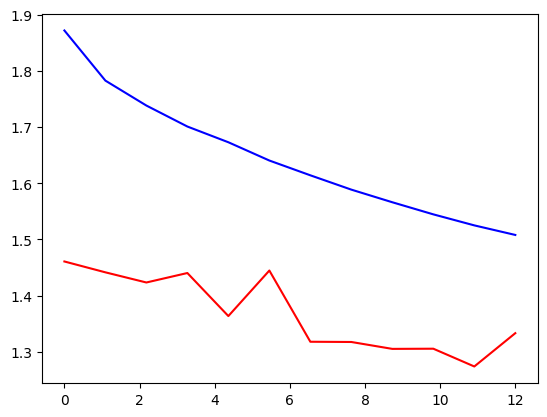

Epoch:13
-----------------------
Loss:1.271061 [    0/ 8493]
Loss:1.192321 [ 3200/ 8493]
Loss:1.367157 [ 6400/ 8493]
Test Error: 
 Accuracy: 70.5%, Avg loss: 1.335321 



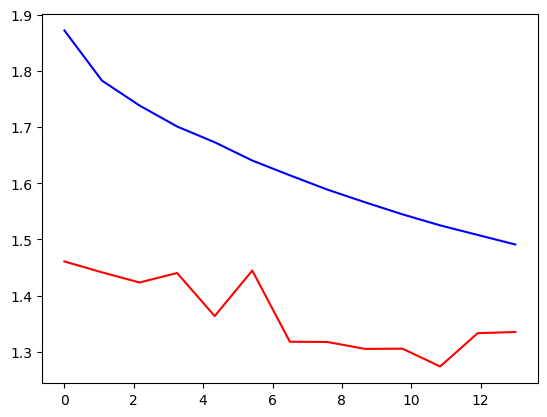

Epoch:14
-----------------------
Loss:1.210125 [    0/ 8493]
Loss:1.252470 [ 3200/ 8493]
Loss:1.330781 [ 6400/ 8493]
Test Error: 
 Accuracy: 77.6%, Avg loss: 1.265407 

Saved Successfully!!



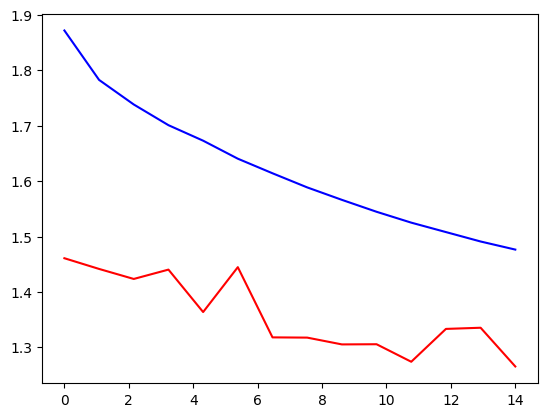

Epoch:15
-----------------------
Loss:1.129910 [    0/ 8493]
Loss:1.321829 [ 3200/ 8493]
Loss:1.145383 [ 6400/ 8493]
Test Error: 
 Accuracy: 75.0%, Avg loss: 1.292897 



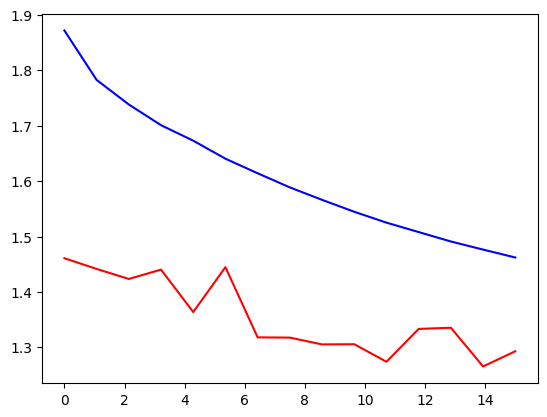

Epoch:16
-----------------------
Loss:1.319008 [    0/ 8493]
Loss:1.224513 [ 3200/ 8493]
Loss:1.174043 [ 6400/ 8493]
Test Error: 
 Accuracy: 75.8%, Avg loss: 1.279049 



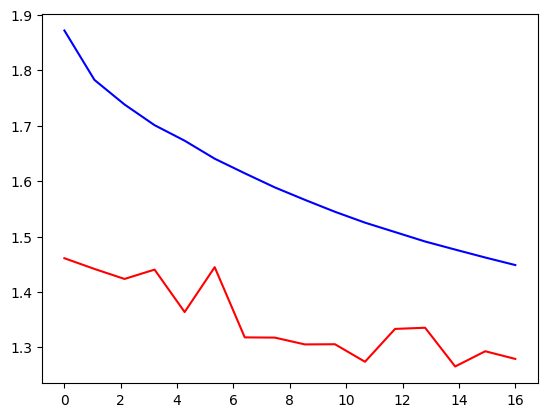

Epoch:17
-----------------------
Loss:1.172889 [    0/ 8493]
Loss:1.223188 [ 3200/ 8493]
Loss:1.193192 [ 6400/ 8493]
Test Error: 
 Accuracy: 77.1%, Avg loss: 1.266570 



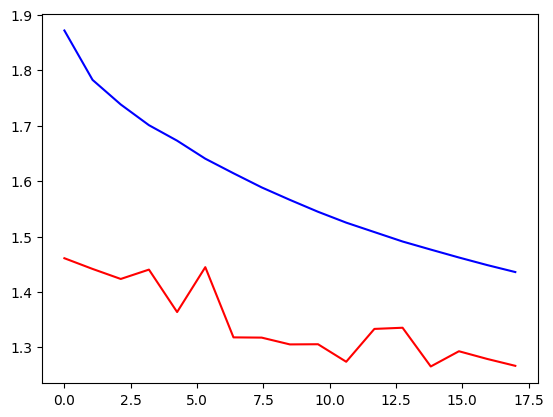

Epoch:18
-----------------------
Loss:1.193738 [    0/ 8493]
Loss:1.184905 [ 3200/ 8493]
Loss:1.148192 [ 6400/ 8493]
Test Error: 
 Accuracy: 76.2%, Avg loss: 1.279330 



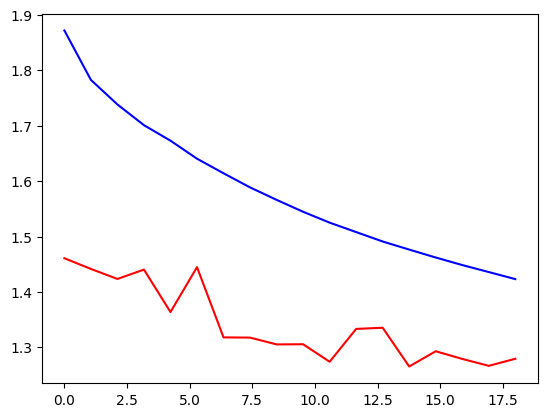

Epoch:19
-----------------------
Loss:1.151734 [    0/ 8493]
Loss:1.168363 [ 3200/ 8493]
Loss:1.198917 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.5%, Avg loss: 1.237338 

Saved Successfully!!



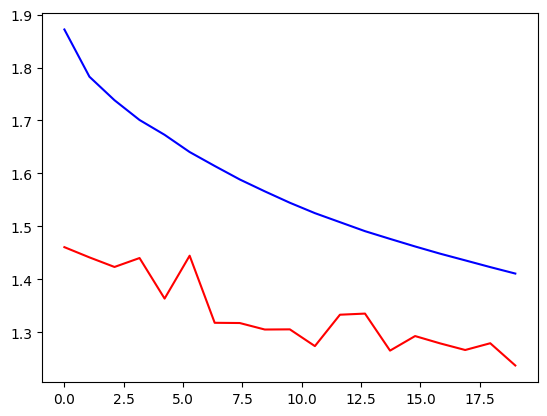

Epoch:20
-----------------------
Loss:1.185226 [    0/ 8493]
Loss:1.167427 [ 3200/ 8493]
Loss:1.103605 [ 6400/ 8493]
Test Error: 
 Accuracy: 77.5%, Avg loss: 1.266350 



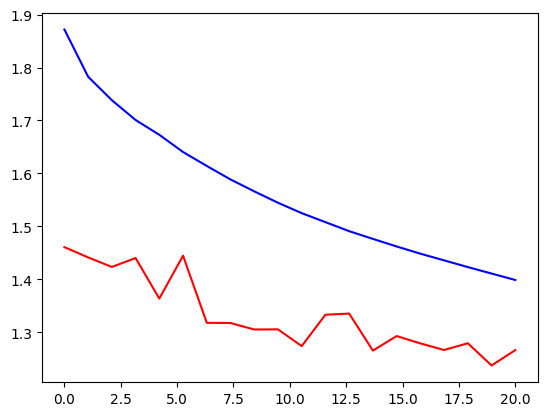

Epoch:21
-----------------------
Loss:1.159669 [    0/ 8493]
Loss:1.145983 [ 3200/ 8493]
Loss:1.177804 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.2%, Avg loss: 1.247846 



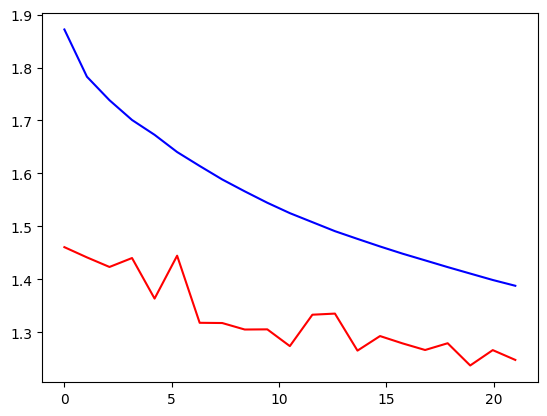

Epoch:22
-----------------------
Loss:1.170343 [    0/ 8493]
Loss:1.110450 [ 3200/ 8493]
Loss:1.220550 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.5%, Avg loss: 1.241380 



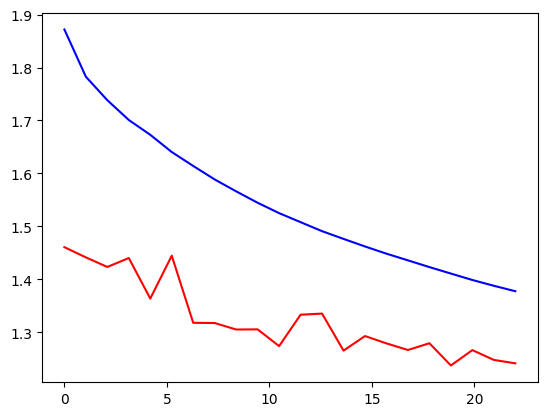

Epoch:23
-----------------------
Loss:1.100015 [    0/ 8493]
Loss:1.155019 [ 3200/ 8493]
Loss:1.091261 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.0%, Avg loss: 1.262437 



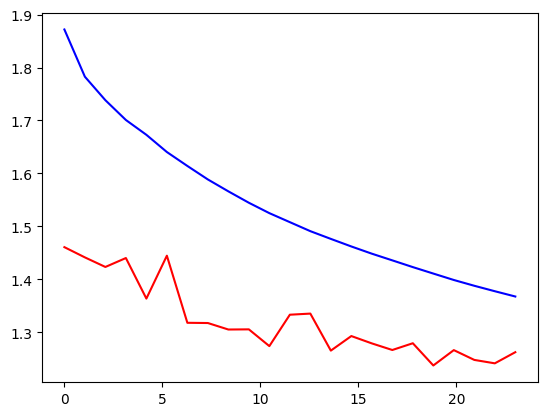

Epoch:24
-----------------------
Loss:1.152342 [    0/ 8493]
Loss:1.114420 [ 3200/ 8493]
Loss:1.136750 [ 6400/ 8493]
Test Error: 
 Accuracy: 76.9%, Avg loss: 1.269081 



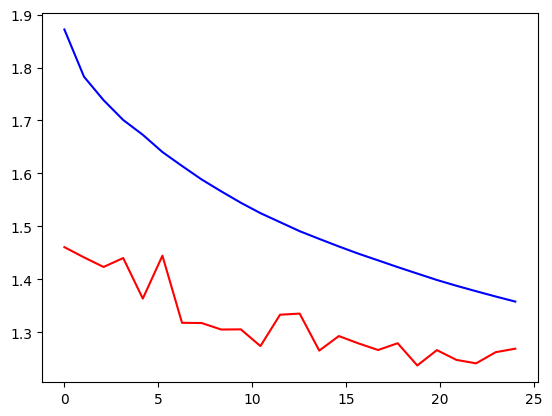

Epoch:25
-----------------------
Loss:1.109977 [    0/ 8493]
Loss:1.112236 [ 3200/ 8493]
Loss:1.106794 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.9%, Avg loss: 1.249797 



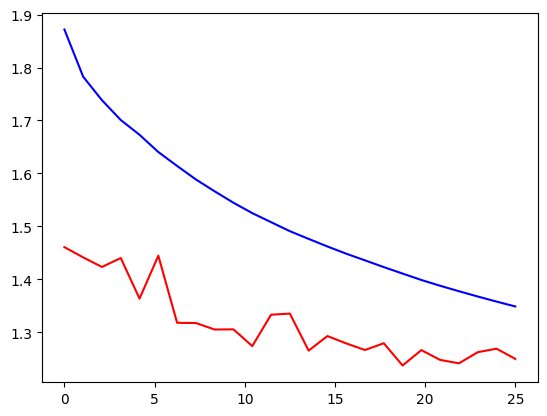

Epoch:26
-----------------------
Loss:1.148328 [    0/ 8493]
Loss:1.132374 [ 3200/ 8493]
Loss:1.225396 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.9%, Avg loss: 1.240739 



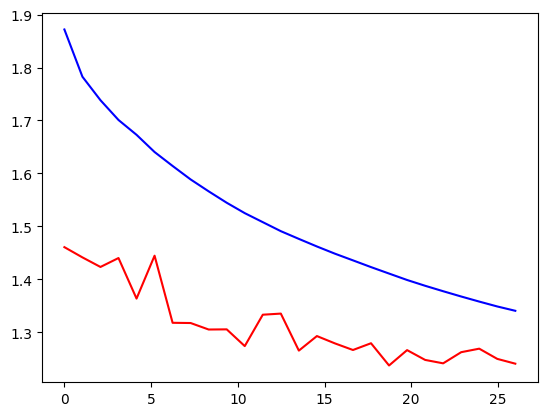

Epoch:27
-----------------------
Loss:1.115557 [    0/ 8493]
Loss:1.068687 [ 3200/ 8493]
Loss:1.098816 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.3%, Avg loss: 1.237842 



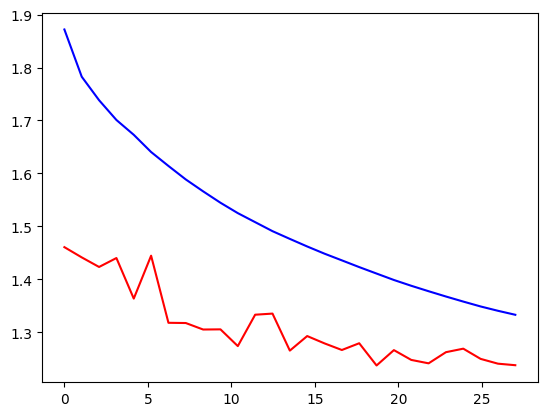

Epoch:28
-----------------------
Loss:1.103666 [    0/ 8493]
Loss:1.123919 [ 3200/ 8493]
Loss:1.080066 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.4%, Avg loss: 1.253113 



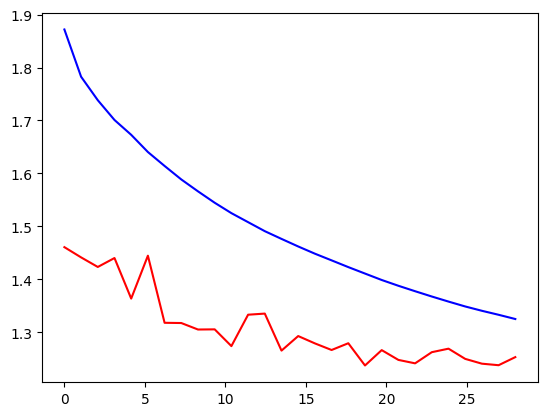

Epoch:29
-----------------------
Loss:1.072086 [    0/ 8493]
Loss:1.174519 [ 3200/ 8493]
Loss:1.162644 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.7%, Avg loss: 1.238888 



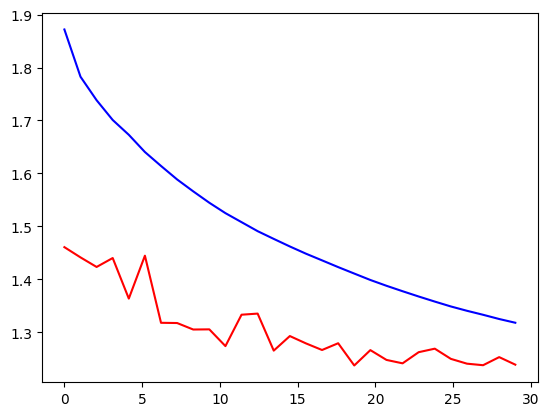

Epoch:30
-----------------------
Loss:1.117420 [    0/ 8493]
Loss:1.073158 [ 3200/ 8493]
Loss:1.120759 [ 6400/ 8493]
Test Error: 
 Accuracy: 77.2%, Avg loss: 1.271673 



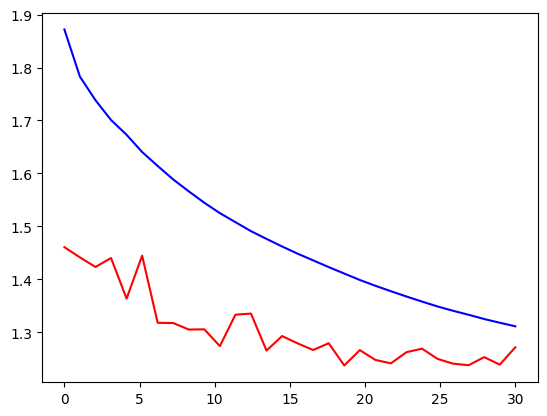

Epoch:31
-----------------------
Loss:1.096838 [    0/ 8493]
Loss:1.127524 [ 3200/ 8493]
Loss:1.052538 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.0%, Avg loss: 1.249708 



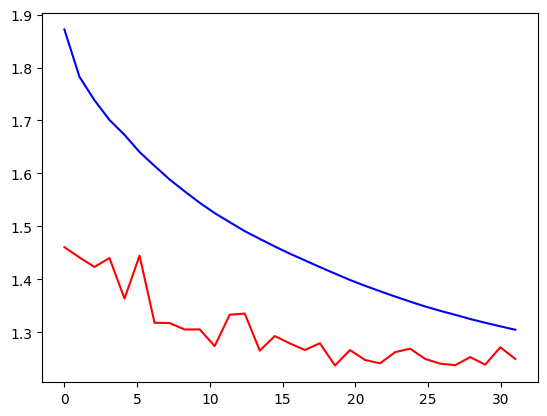

Epoch:32
-----------------------
Loss:1.073685 [    0/ 8493]
Loss:1.073567 [ 3200/ 8493]
Loss:1.076491 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.5%, Avg loss: 1.258868 



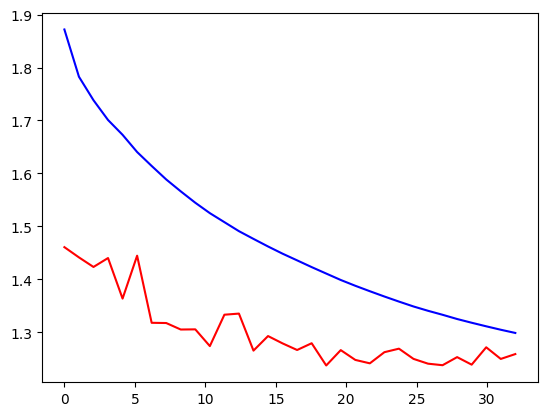

Epoch:33
-----------------------
Loss:1.080512 [    0/ 8493]
Loss:1.076104 [ 3200/ 8493]
Loss:1.187078 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.2%, Avg loss: 1.257549 



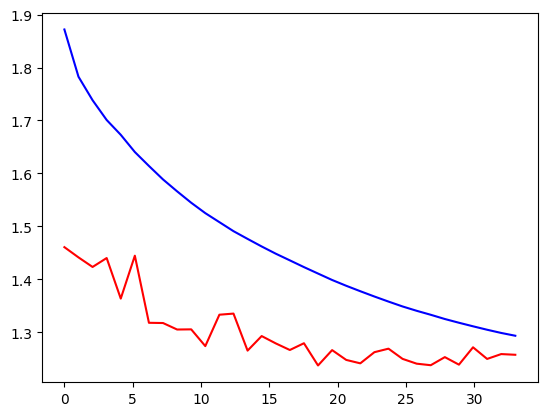

Epoch:34
-----------------------
Loss:1.111842 [    0/ 8493]
Loss:1.147458 [ 3200/ 8493]
Loss:1.090725 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.6%, Avg loss: 1.246506 



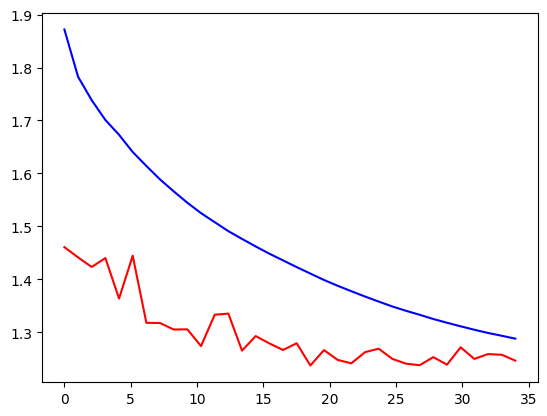

Epoch:35
-----------------------
Loss:1.088596 [    0/ 8493]
Loss:1.130516 [ 3200/ 8493]
Loss:1.116589 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.5%, Avg loss: 1.250295 



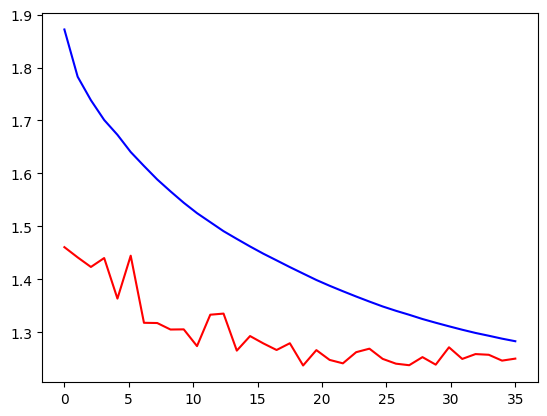

Epoch:36
-----------------------
Loss:1.112419 [    0/ 8493]
Loss:1.088711 [ 3200/ 8493]
Loss:1.124675 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.7%, Avg loss: 1.246132 



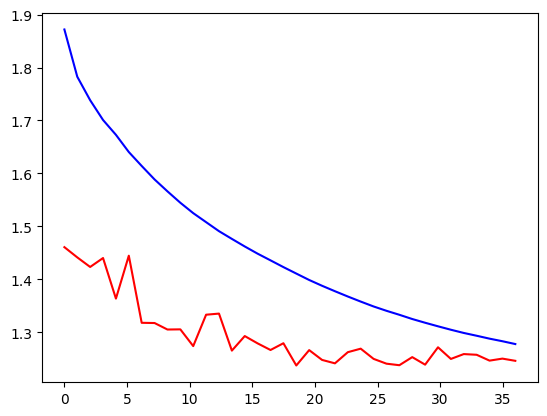

Epoch:37
-----------------------
Loss:1.130193 [    0/ 8493]
Loss:1.074325 [ 3200/ 8493]
Loss:1.127537 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.7%, Avg loss: 1.249466 



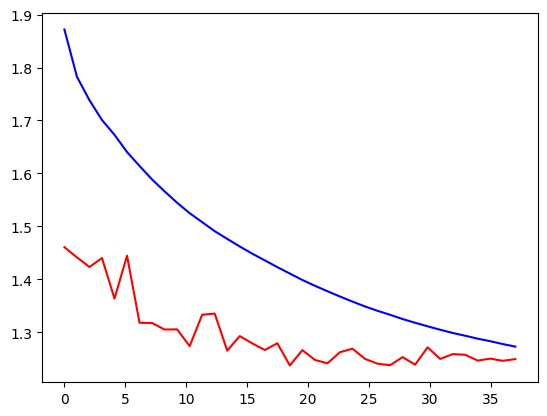

Epoch:38
-----------------------
Loss:1.064759 [    0/ 8493]
Loss:1.072641 [ 3200/ 8493]
Loss:1.198340 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.8%, Avg loss: 1.244326 



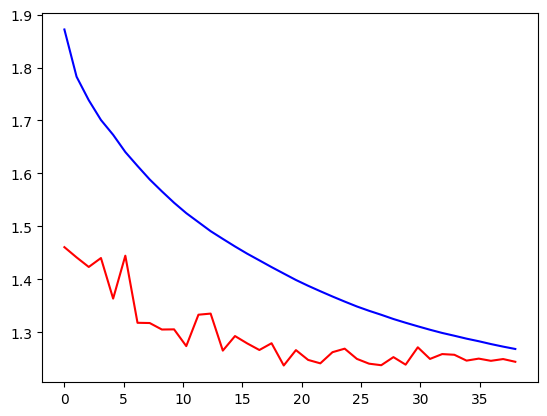

Epoch:39
-----------------------
Loss:1.074347 [    0/ 8493]
Loss:1.138045 [ 3200/ 8493]
Loss:1.129883 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.8%, Avg loss: 1.234583 

Saved Successfully!!



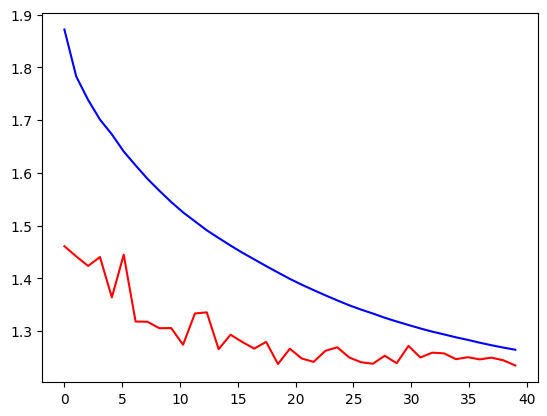

Epoch:40
-----------------------
Loss:1.054285 [    0/ 8493]
Loss:1.047595 [ 3200/ 8493]
Loss:1.127192 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.8%, Avg loss: 1.254095 



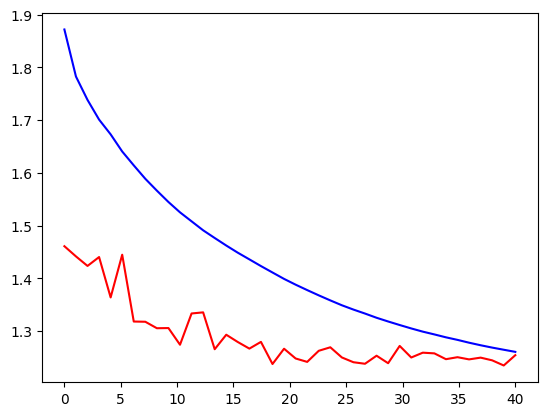

Epoch:41
-----------------------
Loss:1.184200 [    0/ 8493]
Loss:1.141368 [ 3200/ 8493]
Loss:1.127714 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.5%, Avg loss: 1.254923 



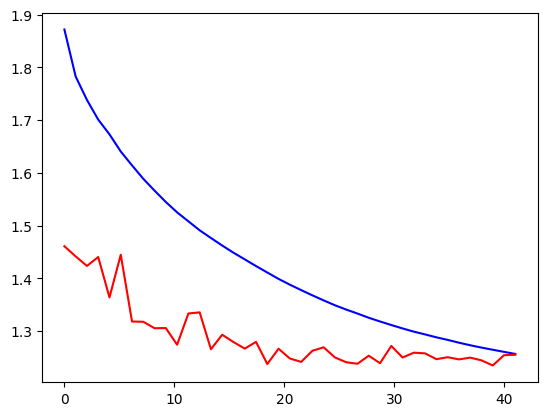

Epoch:42
-----------------------
Loss:1.048549 [    0/ 8493]
Loss:1.077230 [ 3200/ 8493]
Loss:1.113716 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.7%, Avg loss: 1.244617 



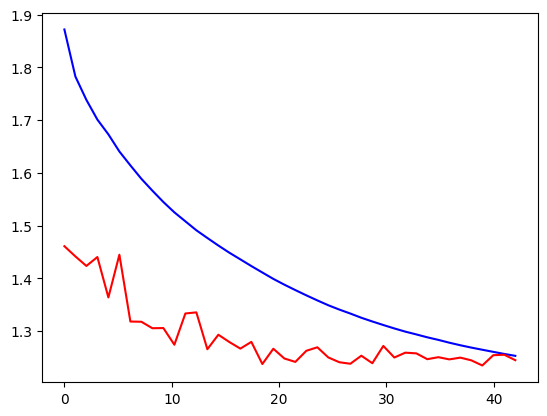

Epoch:43
-----------------------
Loss:1.069223 [    0/ 8493]
Loss:1.116505 [ 3200/ 8493]
Loss:1.154854 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.6%, Avg loss: 1.244818 



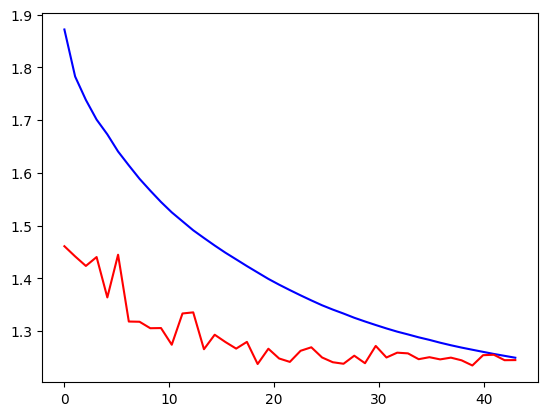

Epoch:44
-----------------------
Loss:1.125747 [    0/ 8493]
Loss:1.098430 [ 3200/ 8493]
Loss:1.048579 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.7%, Avg loss: 1.244607 



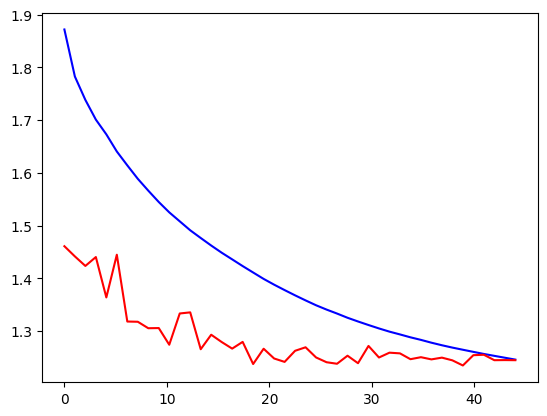

Epoch:45
-----------------------
Loss:1.103503 [    0/ 8493]
Loss:1.233390 [ 3200/ 8493]
Loss:1.143670 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.4%, Avg loss: 1.236054 



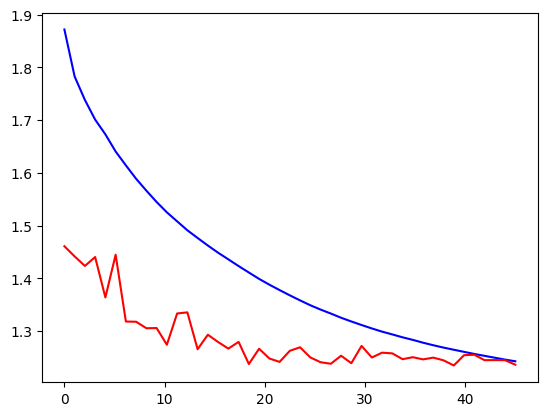

Epoch:46
-----------------------
Loss:1.126925 [    0/ 8493]
Loss:1.076290 [ 3200/ 8493]
Loss:1.158165 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.6%, Avg loss: 1.254938 



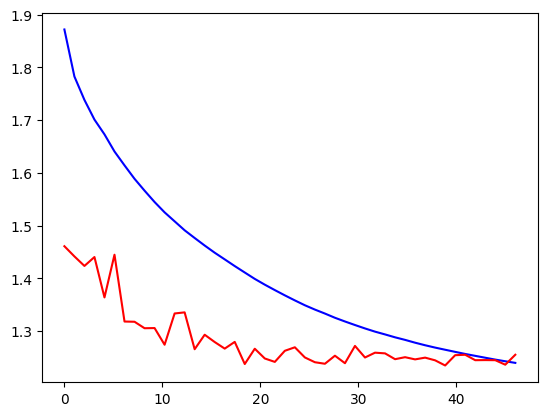

Epoch:47
-----------------------
Loss:1.132789 [    0/ 8493]
Loss:1.055465 [ 3200/ 8493]
Loss:1.072689 [ 6400/ 8493]
Test Error: 
 Accuracy: 77.5%, Avg loss: 1.262897 



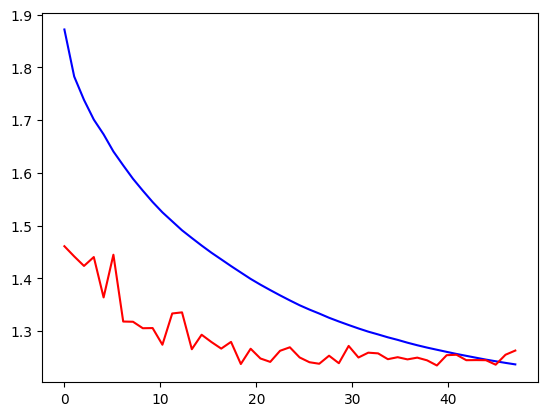

Epoch:48
-----------------------
Loss:1.098099 [    0/ 8493]
Loss:1.053676 [ 3200/ 8493]
Loss:1.119612 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.1%, Avg loss: 1.238079 



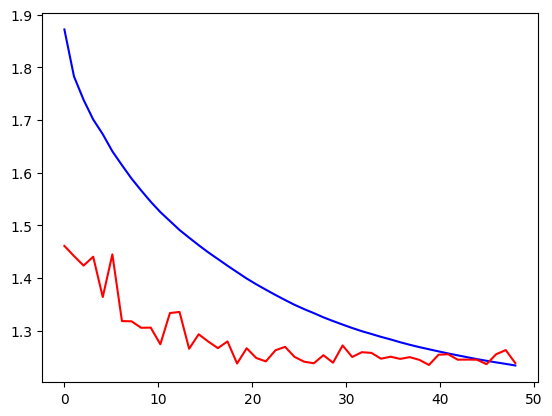

Epoch:49
-----------------------
Loss:1.048507 [    0/ 8493]
Loss:1.084462 [ 3200/ 8493]
Loss:1.108933 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.2%, Avg loss: 1.260452 



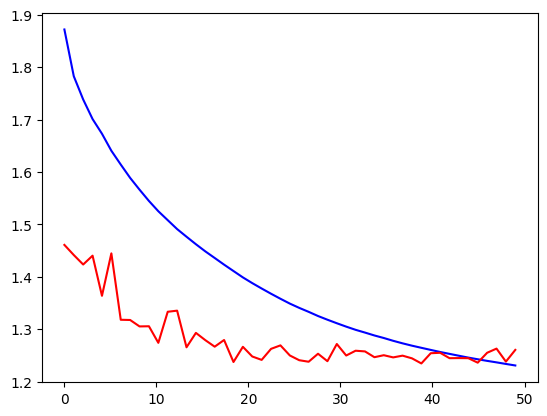

Epoch:50
-----------------------
Loss:1.066948 [    0/ 8493]
Loss:1.079195 [ 3200/ 8493]
Loss:1.096038 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.5%, Avg loss: 1.237077 



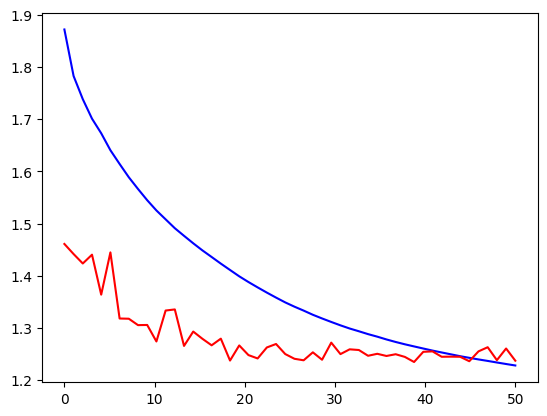

Epoch:51
-----------------------
Loss:1.045678 [    0/ 8493]
Loss:1.100484 [ 3200/ 8493]
Loss:1.102027 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.9%, Avg loss: 1.229329 

Saved Successfully!!



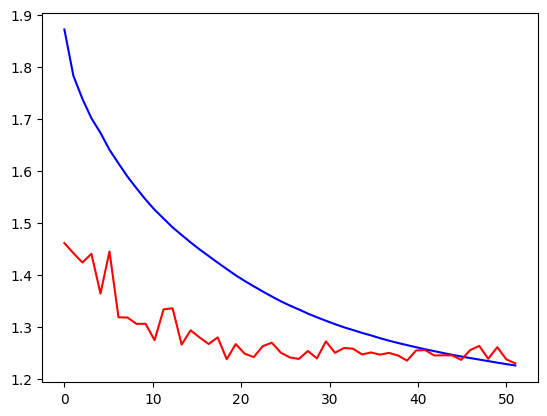

Epoch:52
-----------------------
Loss:1.061665 [    0/ 8493]
Loss:1.073210 [ 3200/ 8493]
Loss:1.100066 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.9%, Avg loss: 1.230164 



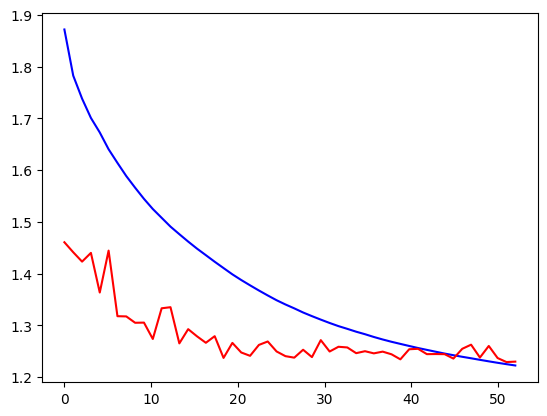

Epoch:53
-----------------------
Loss:1.052814 [    0/ 8493]
Loss:1.088400 [ 3200/ 8493]
Loss:1.089757 [ 6400/ 8493]
Test Error: 
 Accuracy: 82.0%, Avg loss: 1.222953 

Saved Successfully!!



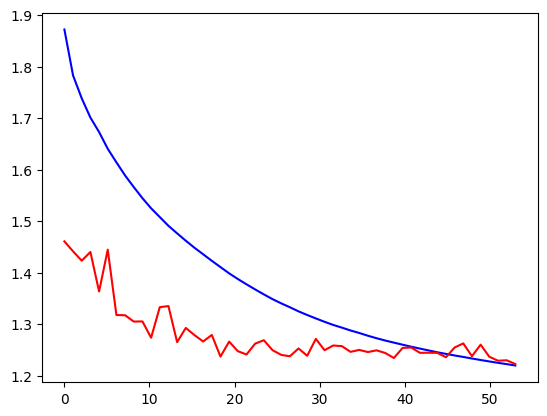

Epoch:54
-----------------------
Loss:1.052952 [    0/ 8493]
Loss:1.130543 [ 3200/ 8493]
Loss:1.095478 [ 6400/ 8493]
Test Error: 
 Accuracy: 77.9%, Avg loss: 1.264567 



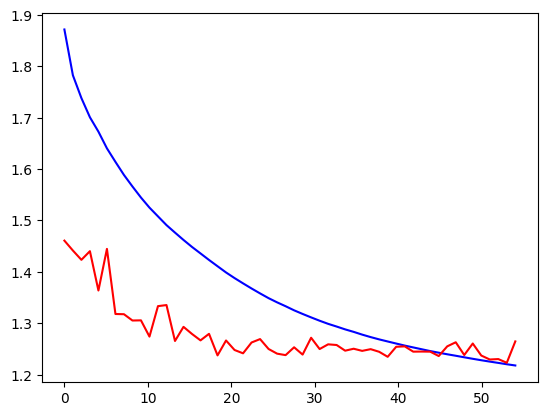

Epoch:55
-----------------------
Loss:1.067523 [    0/ 8493]
Loss:1.048152 [ 3200/ 8493]
Loss:1.053247 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.3%, Avg loss: 1.239531 



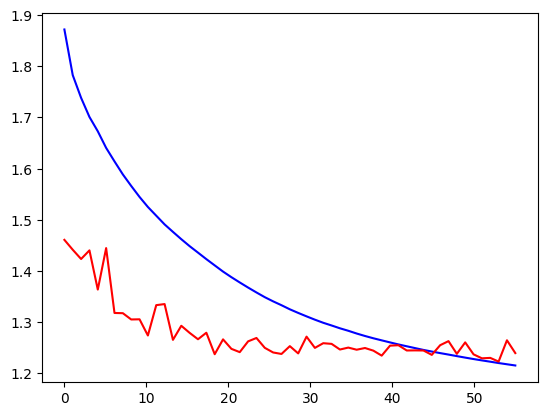

Epoch:56
-----------------------
Loss:1.118504 [    0/ 8493]
Loss:1.071203 [ 3200/ 8493]
Loss:1.184387 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.1%, Avg loss: 1.252423 



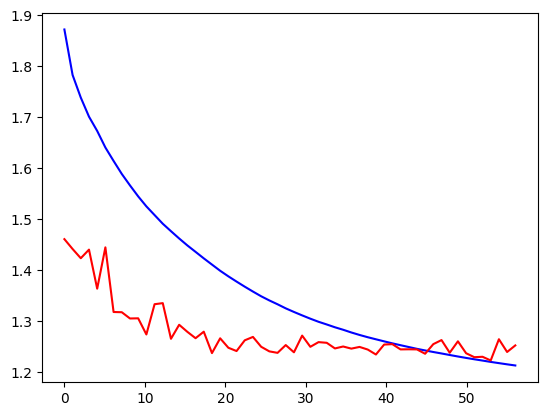

Epoch:57
-----------------------
Loss:1.070669 [    0/ 8493]
Loss:1.141878 [ 3200/ 8493]
Loss:1.064349 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.4%, Avg loss: 1.246182 



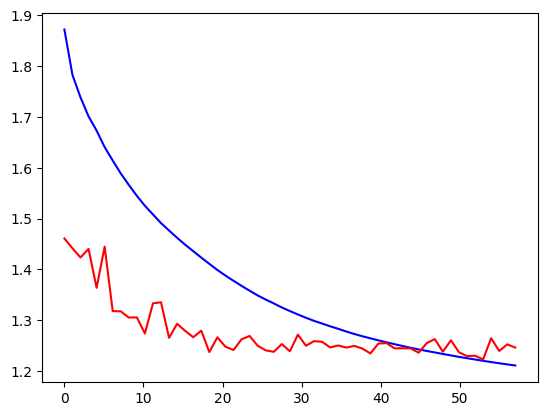

Epoch:58
-----------------------
Loss:1.071684 [    0/ 8493]
Loss:1.066475 [ 3200/ 8493]
Loss:1.092768 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.5%, Avg loss: 1.248608 



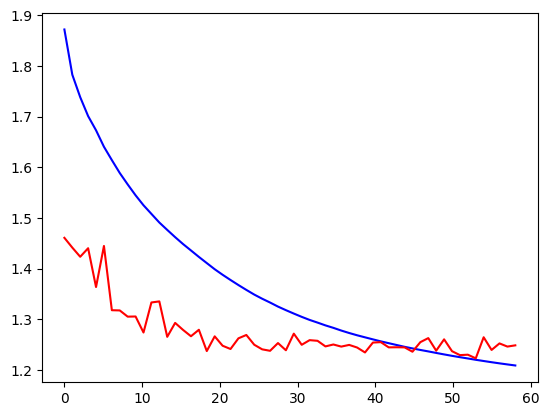

Epoch:59
-----------------------
Loss:1.073296 [    0/ 8493]
Loss:1.050145 [ 3200/ 8493]
Loss:1.085264 [ 6400/ 8493]
Test Error: 
 Accuracy: 81.1%, Avg loss: 1.229682 



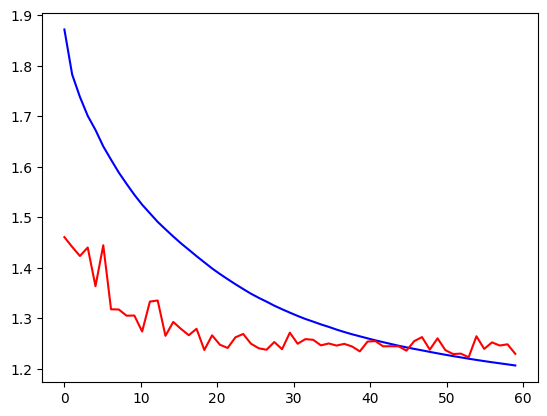

Epoch:60
-----------------------
Loss:1.069932 [    0/ 8493]
Loss:1.099488 [ 3200/ 8493]
Loss:1.061789 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.9%, Avg loss: 1.254086 



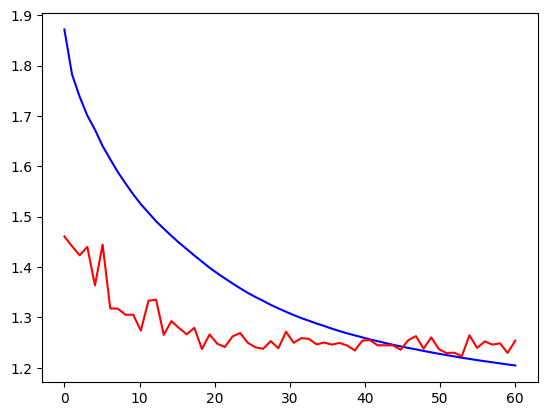

Epoch:61
-----------------------
Loss:1.079894 [    0/ 8493]
Loss:1.102803 [ 3200/ 8493]
Loss:1.105734 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.7%, Avg loss: 1.258582 



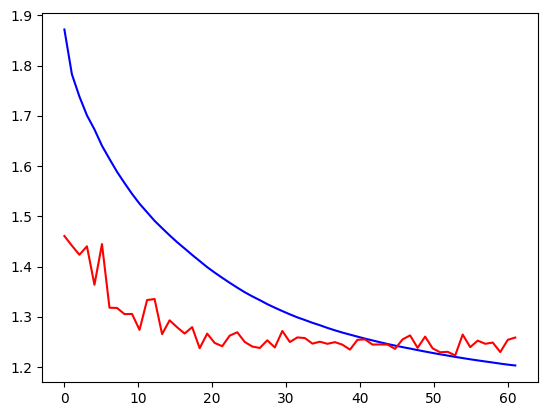

Epoch:62
-----------------------
Loss:1.065703 [    0/ 8493]
Loss:1.093278 [ 3200/ 8493]
Loss:1.104104 [ 6400/ 8493]
Test Error: 
 Accuracy: 74.5%, Avg loss: 1.294983 



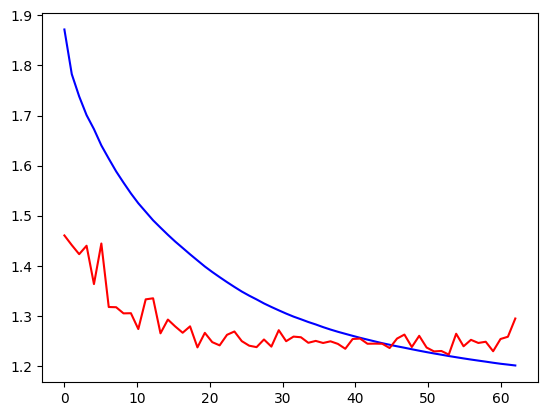

Epoch:63
-----------------------
Loss:1.158267 [    0/ 8493]
Loss:1.107726 [ 3200/ 8493]
Loss:1.128125 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.5%, Avg loss: 1.236023 



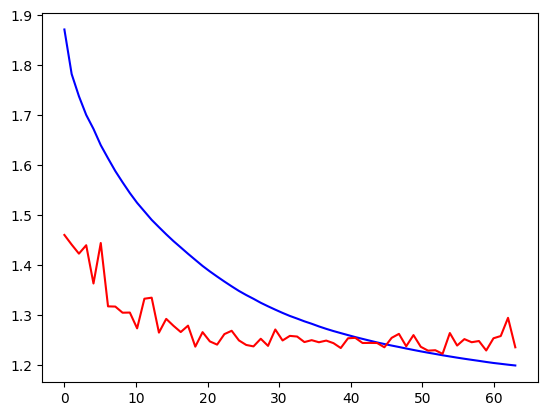

Epoch:64
-----------------------
Loss:1.054271 [    0/ 8493]
Loss:1.069174 [ 3200/ 8493]
Loss:1.108785 [ 6400/ 8493]
Test Error: 
 Accuracy: 75.1%, Avg loss: 1.290637 



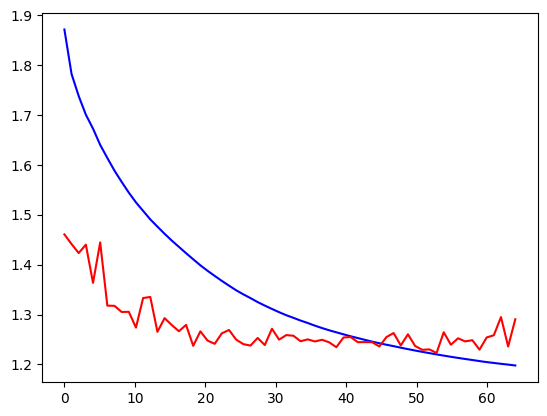

Epoch:65
-----------------------
Loss:1.086871 [    0/ 8493]
Loss:1.049603 [ 3200/ 8493]
Loss:1.088193 [ 6400/ 8493]
Test Error: 
 Accuracy: 77.3%, Avg loss: 1.267347 



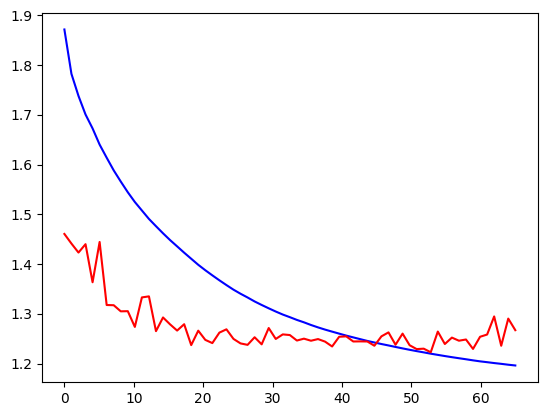

Epoch:66
-----------------------
Loss:1.079155 [    0/ 8493]
Loss:1.078389 [ 3200/ 8493]
Loss:1.066201 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.5%, Avg loss: 1.235319 



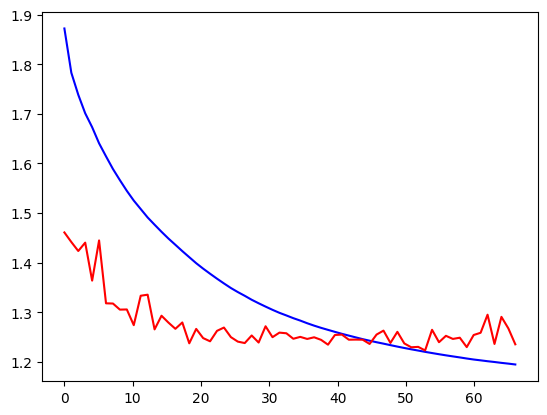

Epoch:67
-----------------------
Loss:1.048095 [    0/ 8493]
Loss:1.046317 [ 3200/ 8493]
Loss:1.083426 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.6%, Avg loss: 1.247195 



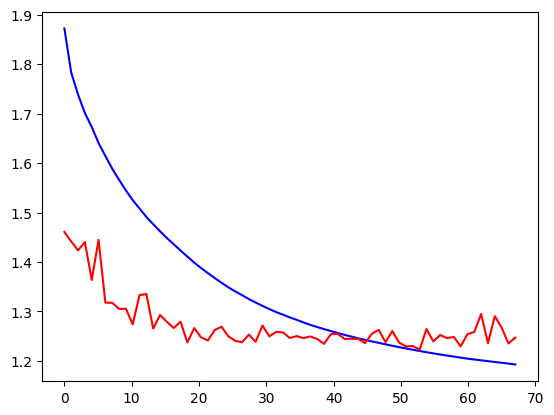

Epoch:68
-----------------------
Loss:1.142961 [    0/ 8493]
Loss:1.136641 [ 3200/ 8493]
Loss:1.162268 [ 6400/ 8493]
Test Error: 
 Accuracy: 75.2%, Avg loss: 1.291803 



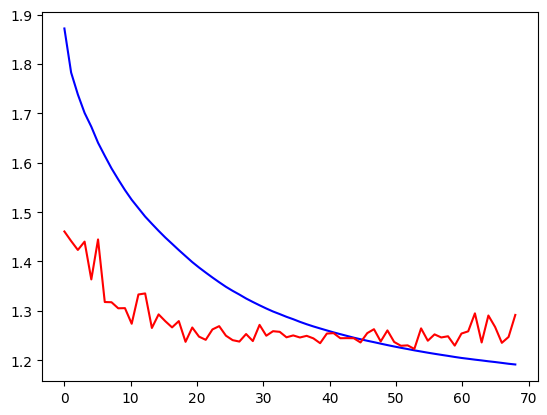

Epoch:69
-----------------------
Loss:1.090564 [    0/ 8493]
Loss:1.080740 [ 3200/ 8493]
Loss:1.142781 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.7%, Avg loss: 1.241831 



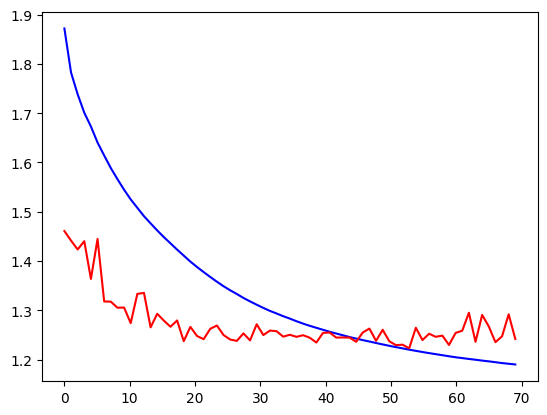

Epoch:70
-----------------------
Loss:1.071736 [    0/ 8493]
Loss:1.047865 [ 3200/ 8493]
Loss:1.095782 [ 6400/ 8493]
Test Error: 
 Accuracy: 81.3%, Avg loss: 1.225591 



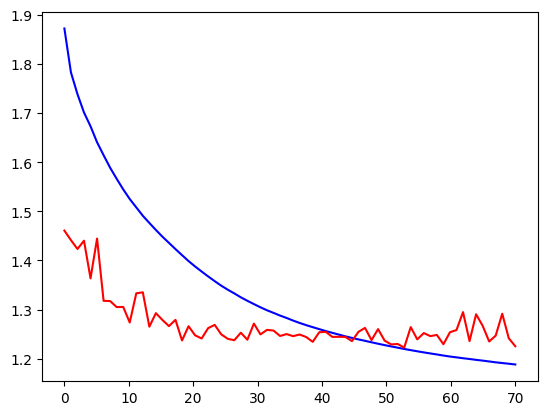

Epoch:71
-----------------------
Loss:1.086592 [    0/ 8493]
Loss:1.130713 [ 3200/ 8493]
Loss:1.095624 [ 6400/ 8493]
Test Error: 
 Accuracy: 81.9%, Avg loss: 1.221473 



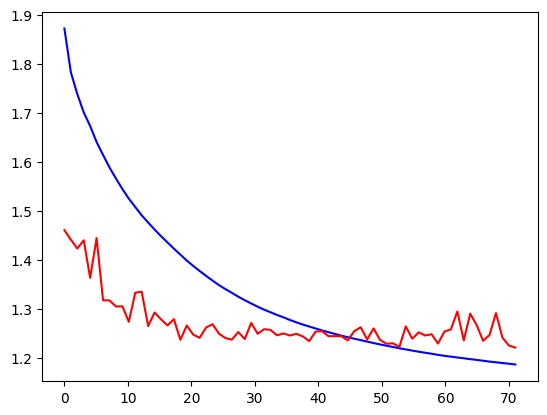

Epoch:72
-----------------------
Loss:1.103572 [    0/ 8493]
Loss:1.071043 [ 3200/ 8493]
Loss:1.047788 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.9%, Avg loss: 1.230014 



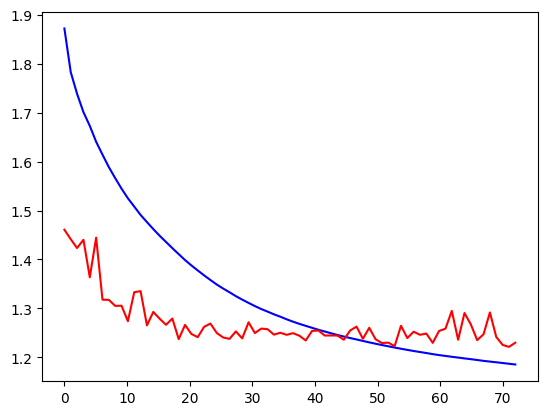

Epoch:73
-----------------------
Loss:1.107775 [    0/ 8493]
Loss:1.079431 [ 3200/ 8493]
Loss:1.050699 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.4%, Avg loss: 1.247814 



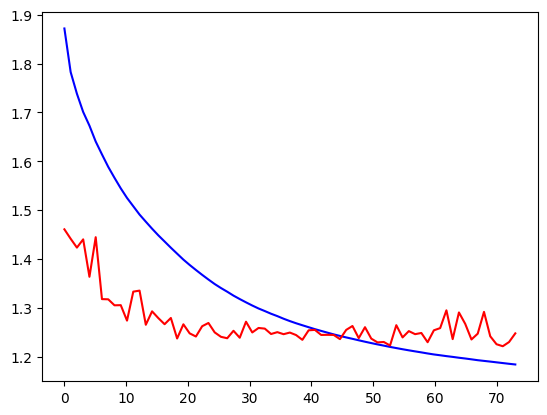

Epoch:74
-----------------------
Loss:1.115014 [    0/ 8493]
Loss:1.050581 [ 3200/ 8493]
Loss:1.053957 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.4%, Avg loss: 1.236715 



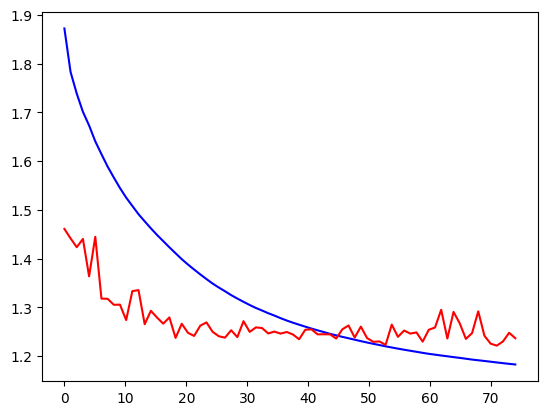

Epoch:75
-----------------------
Loss:1.080954 [    0/ 8493]
Loss:1.079820 [ 3200/ 8493]
Loss:1.111777 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.4%, Avg loss: 1.238273 



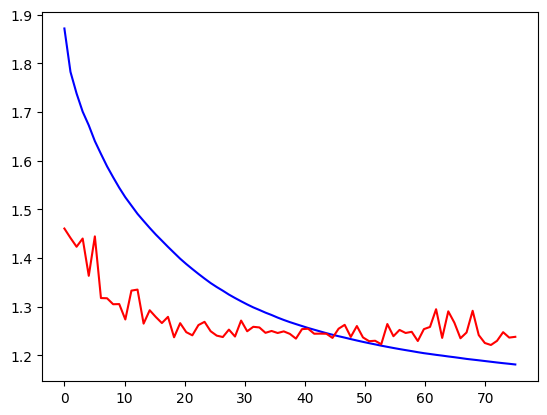

Epoch:76
-----------------------
Loss:1.067321 [    0/ 8493]
Loss:1.118463 [ 3200/ 8493]
Loss:1.047954 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.6%, Avg loss: 1.249318 



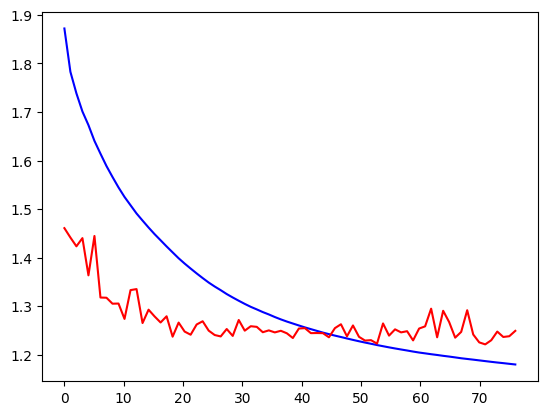

Epoch:77
-----------------------
Loss:1.063935 [    0/ 8493]
Loss:1.095562 [ 3200/ 8493]
Loss:1.080217 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.7%, Avg loss: 1.246749 



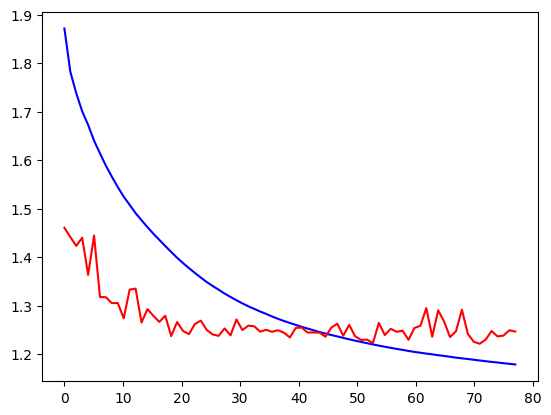

Epoch:78
-----------------------
Loss:1.086979 [    0/ 8493]
Loss:1.057779 [ 3200/ 8493]
Loss:1.091688 [ 6400/ 8493]
Test Error: 
 Accuracy: 77.7%, Avg loss: 1.263932 



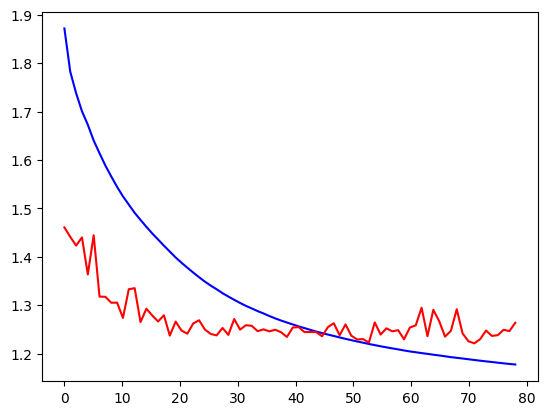

Epoch:79
-----------------------
Loss:1.081434 [    0/ 8493]
Loss:1.076034 [ 3200/ 8493]
Loss:1.114868 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.5%, Avg loss: 1.246534 



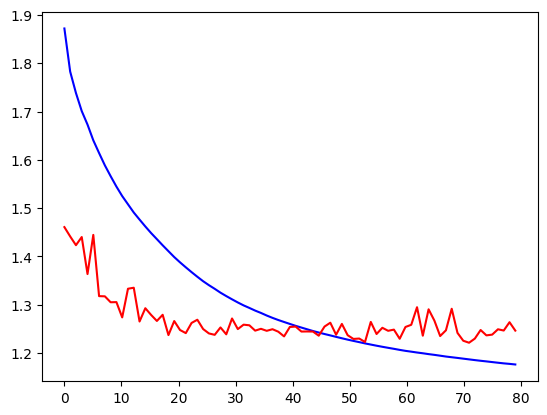

Epoch:80
-----------------------
Loss:1.051672 [    0/ 8493]
Loss:1.092470 [ 3200/ 8493]
Loss:1.186487 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.8%, Avg loss: 1.252716 



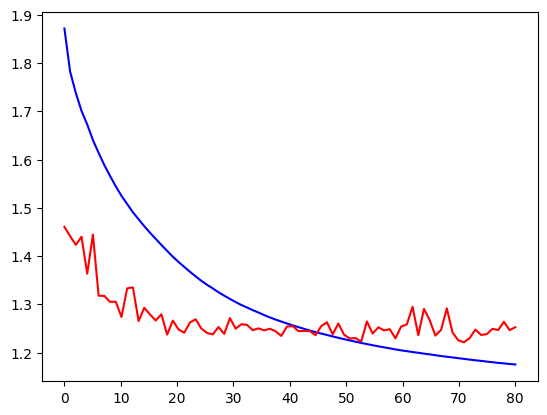

Epoch:81
-----------------------
Loss:1.102762 [    0/ 8493]
Loss:1.044862 [ 3200/ 8493]
Loss:1.064957 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.4%, Avg loss: 1.233496 



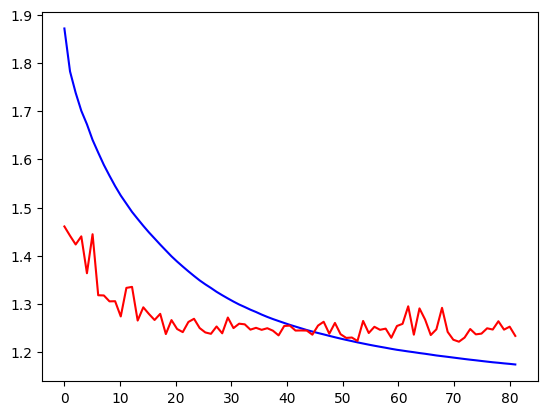

Epoch:82
-----------------------
Loss:1.139837 [    0/ 8493]
Loss:1.091915 [ 3200/ 8493]
Loss:1.050712 [ 6400/ 8493]
Test Error: 
 Accuracy: 76.6%, Avg loss: 1.273472 



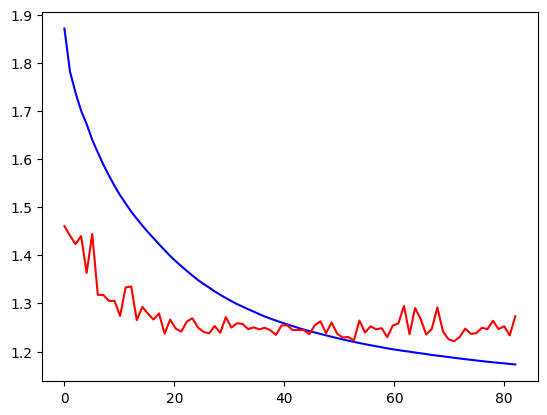

Epoch:83
-----------------------
Loss:1.090188 [    0/ 8493]
Loss:1.099528 [ 3200/ 8493]
Loss:1.095769 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.9%, Avg loss: 1.231439 



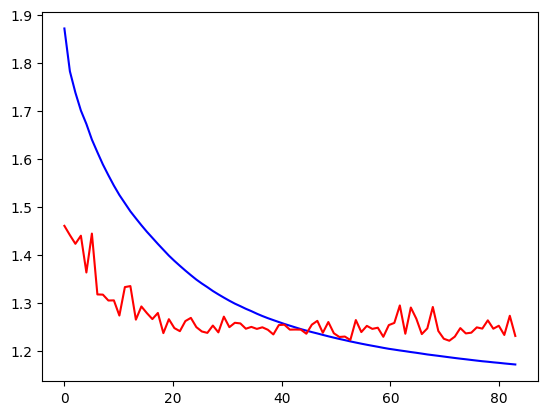

Epoch:84
-----------------------
Loss:1.085628 [    0/ 8493]
Loss:1.069808 [ 3200/ 8493]
Loss:1.072731 [ 6400/ 8493]
Test Error: 
 Accuracy: 78.4%, Avg loss: 1.257058 



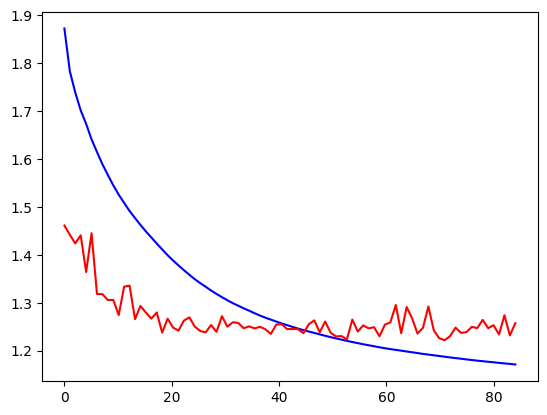

Epoch:85
-----------------------
Loss:1.067444 [    0/ 8493]
Loss:1.089198 [ 3200/ 8493]
Loss:1.071614 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.8%, Avg loss: 1.231199 



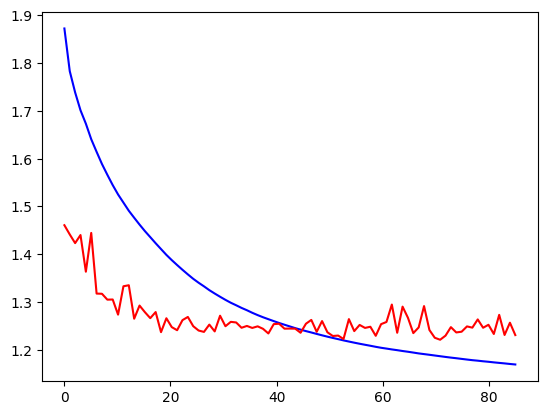

Epoch:86
-----------------------
Loss:1.087850 [    0/ 8493]
Loss:1.054383 [ 3200/ 8493]
Loss:1.106243 [ 6400/ 8493]
Test Error: 
 Accuracy: 77.7%, Avg loss: 1.262115 



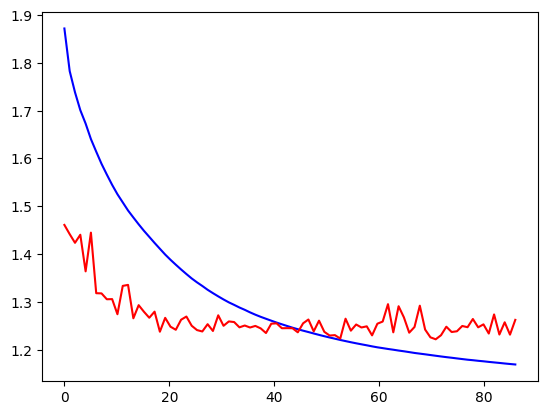

Epoch:87
-----------------------
Loss:1.118547 [    0/ 8493]
Loss:1.066108 [ 3200/ 8493]
Loss:1.138920 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.4%, Avg loss: 1.237413 



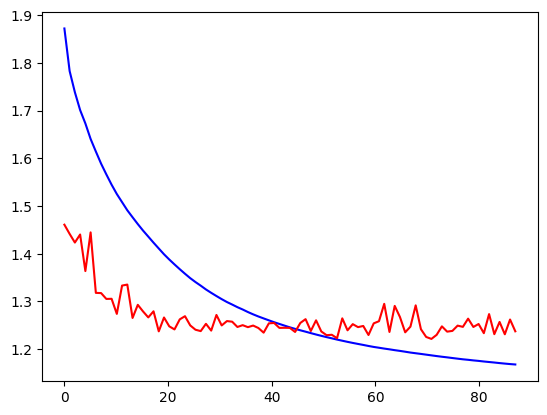

Epoch:88
-----------------------
Loss:1.045614 [    0/ 8493]
Loss:1.143219 [ 3200/ 8493]
Loss:1.105665 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.5%, Avg loss: 1.234042 



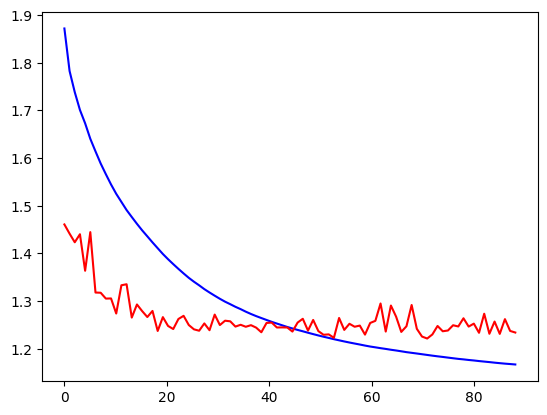

Epoch:89
-----------------------
Loss:1.063342 [    0/ 8493]
Loss:1.061904 [ 3200/ 8493]
Loss:1.081295 [ 6400/ 8493]
Test Error: 
 Accuracy: 81.9%, Avg loss: 1.218394 



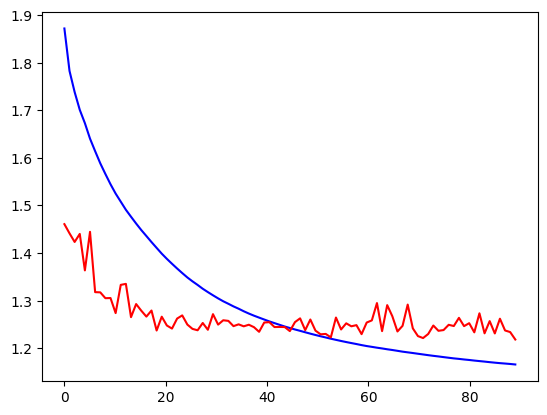

Epoch:90
-----------------------
Loss:1.048212 [    0/ 8493]
Loss:1.077190 [ 3200/ 8493]
Loss:1.085502 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.7%, Avg loss: 1.242578 



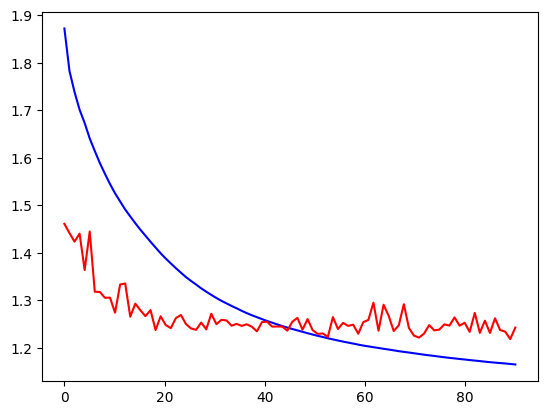

Epoch:91
-----------------------
Loss:1.084851 [    0/ 8493]
Loss:1.048555 [ 3200/ 8493]
Loss:1.068507 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.7%, Avg loss: 1.242829 



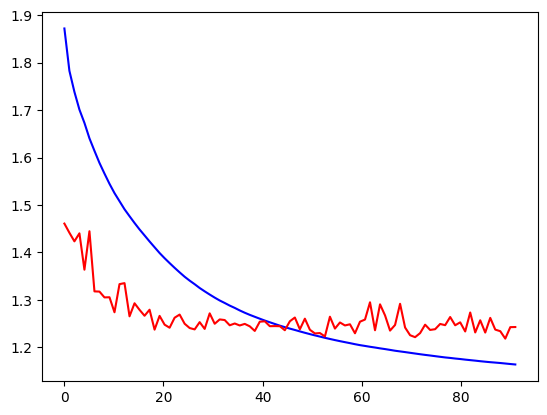

Epoch:92
-----------------------
Loss:1.060138 [    0/ 8493]
Loss:1.088860 [ 3200/ 8493]
Loss:1.087801 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.0%, Avg loss: 1.250222 



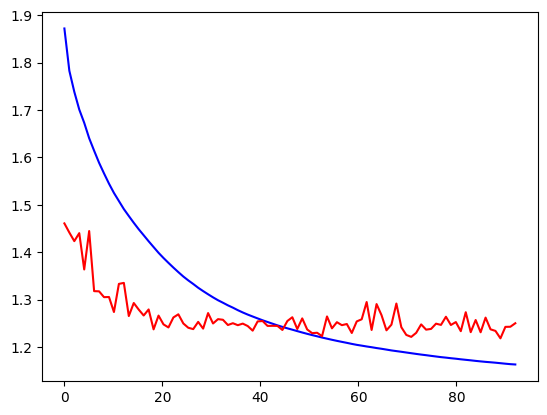

Epoch:93
-----------------------
Loss:1.080512 [    0/ 8493]
Loss:1.133700 [ 3200/ 8493]
Loss:1.071356 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.7%, Avg loss: 1.240973 



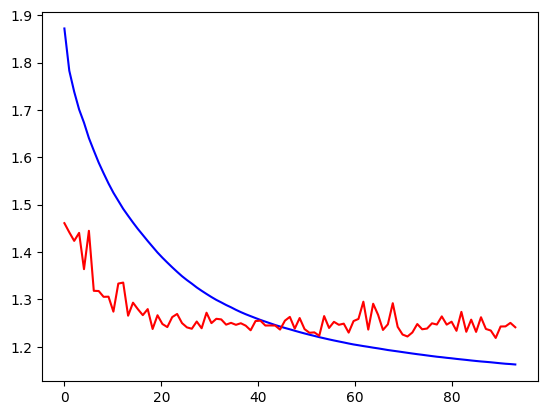

Epoch:94
-----------------------
Loss:1.048676 [    0/ 8493]
Loss:1.044805 [ 3200/ 8493]
Loss:1.044229 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.8%, Avg loss: 1.231720 



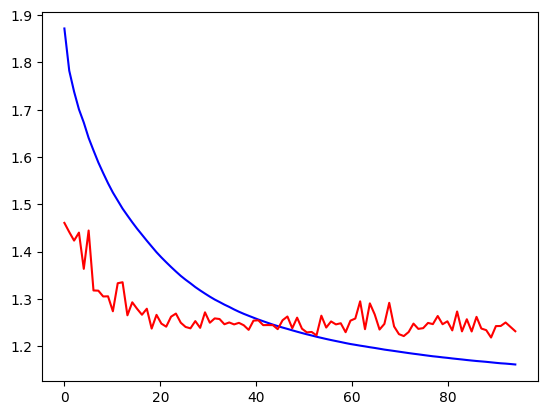

Epoch:95
-----------------------
Loss:1.092576 [    0/ 8493]
Loss:1.058017 [ 3200/ 8493]
Loss:1.065489 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.1%, Avg loss: 1.242005 



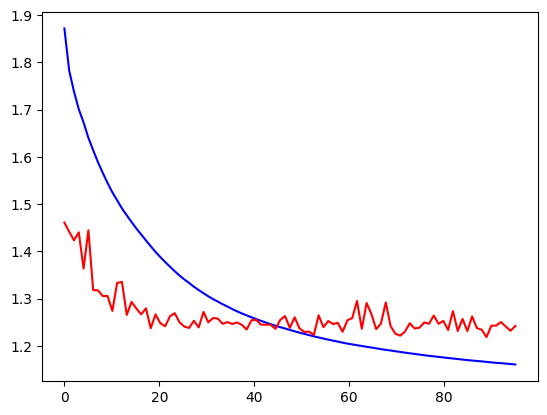

Epoch:96
-----------------------
Loss:1.062564 [    0/ 8493]
Loss:1.065760 [ 3200/ 8493]
Loss:1.110445 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.8%, Avg loss: 1.231671 



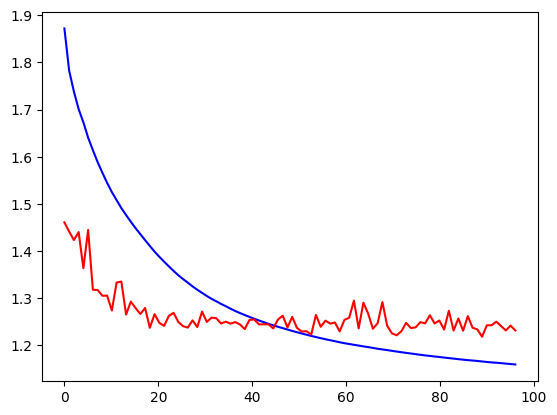

Epoch:97
-----------------------
Loss:1.080906 [    0/ 8493]
Loss:1.044542 [ 3200/ 8493]
Loss:1.066673 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.1%, Avg loss: 1.251707 



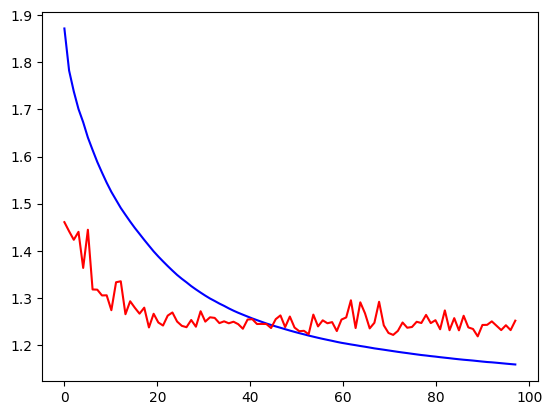

Epoch:98
-----------------------
Loss:1.092551 [    0/ 8493]
Loss:1.055091 [ 3200/ 8493]
Loss:1.120142 [ 6400/ 8493]
Test Error: 
 Accuracy: 79.8%, Avg loss: 1.242699 



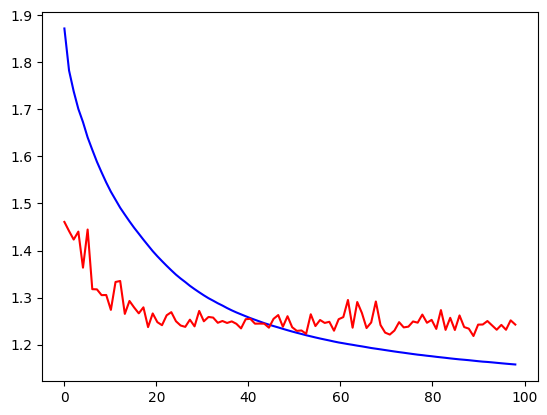

Epoch:99
-----------------------
Loss:1.075125 [    0/ 8493]
Loss:1.134806 [ 3200/ 8493]
Loss:1.088637 [ 6400/ 8493]
Test Error: 
 Accuracy: 81.0%, Avg loss: 1.227378 



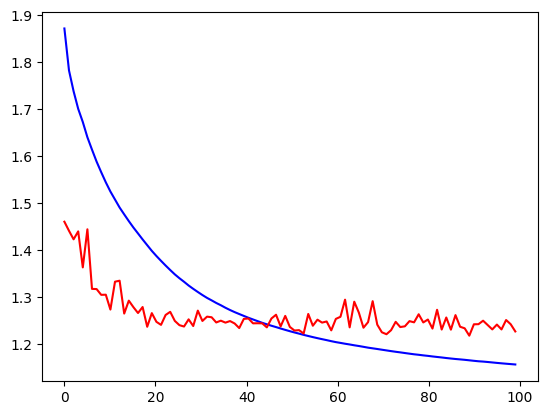

Epoch:100
-----------------------
Loss:1.094332 [    0/ 8493]
Loss:1.080654 [ 3200/ 8493]
Loss:1.065631 [ 6400/ 8493]
Test Error: 
 Accuracy: 80.0%, Avg loss: 1.238642 



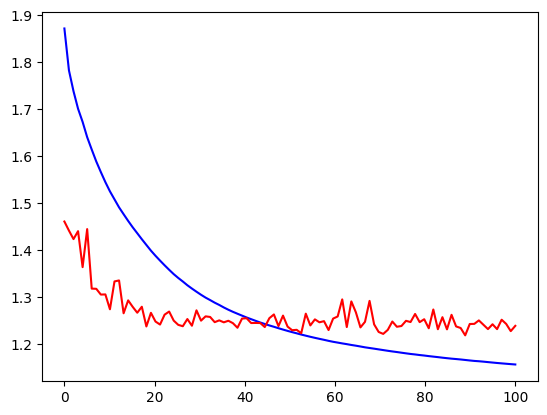

Done!!
Best Accuracy: 0.8195949128591615


In [8]:
epochs = 100
Train_Loss = []
Test_Loss = []
temp = []
for t in range(epochs):
    print(f"Epoch:{t+1}\n-----------------------")
    train(inception, train_dl, loss_fn, inception_optimizer)
    test(inception, test_dl, criteria)
    x = torch.linspace(0, len(Train_Loss), len(Train_Loss))
    
    plt.plot(x, Train_Loss, color='blue')
    plt.plot(x, Test_Loss, color='red')
    plt.show()
print("Done!!")
print(f"Best Accuracy: {prevAcc}")

In [9]:
from sklearn.metrics import classification_report
y_true = []
y_pred = []
# 
inception.eval()
# 
with torch.no_grad():
    for image, label in test_dl:
        image = image.to(device)
        # 
        output = inception(image)
        # 
        _, pred = torch.max(output, 1)
        y_true.extend(label.numpy())
        y_pred.extend(pred.detach().cpu().numpy())
y_true = np.array(y_true)
y_pred = np.array(y_pred)
target_names=['AMD','D','Drusen','ERM','M','N']
print(classification_report(y_true, y_pred, target_names=target_names))

/opt/conda/lib/python3.10/site-packages/torch/nn/modules/module.py:1553: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


              precision    recall  f1-score   support

         AMD       0.93      0.96      0.94       330
           D       0.48      0.55      0.51       323
      Drusen       0.95      0.88      0.92       349
         ERM       0.89      0.87      0.88       453
           M       0.97      0.99      0.98       298
           N       0.61      0.56      0.59       370

    accuracy                           0.80      2123
   macro avg       0.81      0.80      0.80      2123
weighted avg       0.81      0.80      0.80      2123



In [1]:
prevAcc = 0.0
model = inception
dataloader = test_dl
y_true = []
y_pred = []
size = len(dataloader.dataset)
batch_num = len(dataloader)
model.eval()

test_loss, correct = 0,0
for batch, (x,y) in enumerate(dataloader):
    x, y = x.to(device), y.to(device)
    pred = model(x)
    test_loss += loss_fn(pred, y).item()
    correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    predicted = pred.argmax(1)
    y_true.append(y.detach().cpu().numpy())
    y_pred.append(predicted.detach().cpu().numpy())
y_true = np.array(y_true)
y_pred = np.array(y_pred)

test_loss /= batch_num
Test_Loss.append(test_loss)
correct /= size
print(correct)
print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
target_names=['AMD','D','Drusen','ERM','M','N']
print(classification_report(y_true, y_pred, target_names=target_names))

# global prevAcc
# if prevAcc < correct:
#     ######
#     name = "vgg16_v1.pth"
#     torch.save(vgg16.state_dict(), name)
#     ######
#     print("Saved Successfully!!\n")
#     prevAcc = correct

NameError: name 'test' is not defined